# Atratores Caóticos

* PET - Física
* Petiano: Wallysson Pereira da Silva
* Data: 04/07/2025

$\quad$ O presente `Notebook` tem como objetivo introduzir a teoria dos atratores caóticos, junto com a ilustração, através de simulação 3D, de alguns atratores relevantes na literatura. 

## Pré-requisitos

$\quad$ Toda a teoria necessária sobres os atratores caóticos será introduzida neste `Notebook`, de modo que não será necessário conhecimento breve no tópico. Contudo, a principal ferramenta utilizada nesse trabalho será a intregação numérica através de Runge-Kutta de Quarta Ordem. Logo, é recomendado que o leitor tenha uma noção mínima da existência desse método e de como utilizá-lo.

## Importando bibliotecas

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation
from matplotlib.colors import hsv_to_rgb

## Informações sobre as bibliotecas

In [107]:
%load_ext version_information
%version_information Matplotlib, Numpy

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.13.0 64bit [MSC v.1941 64 bit (AMD64)]
IPython 8.29.0
OS Windows 11 10.0.26100 SP0
Matplotlib 3.9.2
Numpy 2.1.3
Fri Jun 27 23:37:32 2025 Hora oficial do Brasil

## Teoria Geral

$\quad$ Antes da definição de um atrator caótico, vale uma pequena revisão sobre sistemas dinâmicos. Um sistema dinâmico, fisicamente falando, é composto por um sistema de EDO que descrevem o comportamento das $n$ variáveis que definem o sistema. Tais variáveis não precisam ser necessariamente grandezas espaciais. Nesse contexto, pode-se atribuir o valor de cada variável à um eixo e definir-se o espaço de fase. Em tal espaço, dado uma condição inicial (um ponto de partida), as EDOs determinam o comportamente do sistema dado um pequeno intervalo de tempo. Para obter o comportamento do sistema durante um longo período de tempo, é necessário integrar as equações, onde normalmente se utiliza de integração numérica para tal. 

$\quad$ Dentro desse espaço, pode acontecer de determinados pontos serem espaciais, sendo eles os denominados atratores do espaço de fase. Um atrator é definido de tal forma que, qualquer trajetória que entre a um determinado intervalo de distância até o atrator, não consiga mais escapar da sua influência. Tal trajetória pode ser periódica ou caótica. Caso esse segundo caso ocorra, teremos um atrator caótico no nosso espaço de fase desse sistema caótico.

$\quad$ É da natureza das trajetórias próximas à um atrator caótico ser altamente dependente das condições iniciais. Condições iniciais próximas podem evoluir para trajetórias arbitrariamente distantes, dado um número de interações. De forma contrária, essas mesmas trajetórias distantes podem convergir para pontos arbitrariamente próximos. Contudo, num atrator caótico, essas trajetórias sempre ficam em regiões próximas ao atrator.

$\quad$ Boa parte da não tão recente alavancada nos estudos de sistemas caóticos, ocorrida por volta da metade do século XX, foi devido à evolução tecnológica dos computadores. Muitas das propriedades comportamentais dos sistemas dinâmicos caóticos só podem ser estudados por meio de simulações físicas, ferramenta essa que era bem limitada nos primeiros computadores, tanto na questão do poder de processamento (que era mediocro para os propositovs desejados) quanto na confiabilidade dos resultados, que muitas vezes era bem questionável.  

$\quad$ Assim, o que faremos no presente trabalho é apresentar alguns dos atratores caóticos mais conhecidos e importantes da literatura, evoluindo trajetórias (com condições iniciais próximas) no espaço de fase e observar seu comportamento. Para tal, utilizaremos a biblioteca de integração numérica `scipy.integrate`, que nos fornece a função `ódeint`, cuja funcionalidade é evoluir temporalmente determinada condição iniocial dado as EDOs.

## Atrator de Lorenz

$\quad$ Obviamente teríamos de começar pelo mais famoso atrator caótico da literatura: o Atrator de Lorenz. Ele é especialmente famoso por ter sido o primeiro atrator descoberto. Ao analisar certo sistema de EDOs que descreviam a convecção atmosférica, matemático e climatologista Edward Lorenz percebeu certa sensbilidade em relação às condições iniciais do sistema. Isto é, trajetória que iniciavam próximas divergiam uma da outra de maneira muito rápida, de modo que se tornava invivável fazer predições a longo prazo nesse sistema. Nesse contexto que surge a expressão do efeito bortoleta, como uma anedota ao fato de que "o bater de asas de uma borboleta no Brasil pode ocasionar um tornado no Texas".

$\quad$ O sistema de EDOs analizado por Lorenz foi o seguinte:


$$
\frac{dx}{dt} = \sigma (-x+y), \quad \frac{dy}{dt} = -xz+\rho x - y \quad \text{e} \quad \frac{dz}{dt} = xy-\beta z.
$$

Onde podemos definir a seguinte função, já num formato conveninente para usar na função `odeint`.

In [108]:
def lorenz(r, t, sigma, rho, beta):
    x, y, z = r[0], r[1], r[2]  
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

$\quad$ Como um meio de ilustrar o sistema de EDOs, iremos evoluir a condição inicial **(1,1,1)** no espaço de fase dessas EDOs, exibindo o resultando num plot 3D. Definindo determinados valores para as constantes que tornam o sistema caótico (já conhecidos na literatura) e desenvolvendo o código do plot, temos  

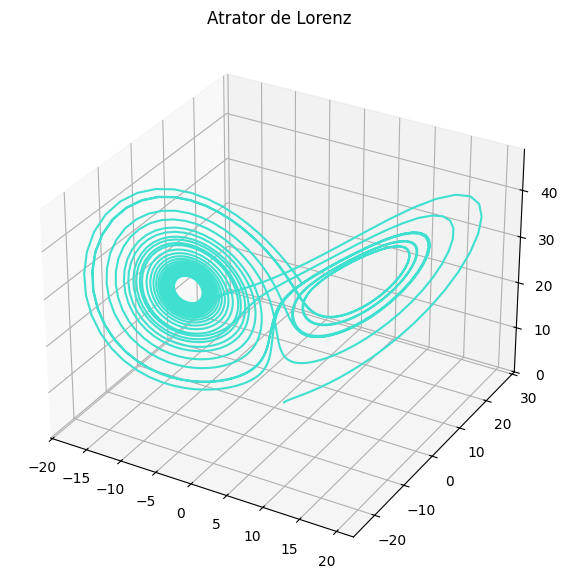

In [109]:
# Parâmetros do sistema
sigma = 10
rho = 28
beta = 8/3

# Condição inicial
r0 = [1,1,1]


# Vetor temporal
tempos = np.linspace(0, 25, 2000)

sol = odeint(lorenz, r0, tempos, args = (sigma,rho, beta))

# Plotagem
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], color="turquoise")
ax.set_title("Atrator de Lorenz")
plt.show()

$\quad$ Uma das formas de visualizar a dinâmica desse sistema é evoluí-lo e fazer o plot da projeção em alguma dos planos (x, y ou z). É inclusive em um dessas projeções que temos o famoso formato de asas de borboleta do sistema de Lorenz. Assim, iremos fazer 

Text(0, 0.5, 'z')

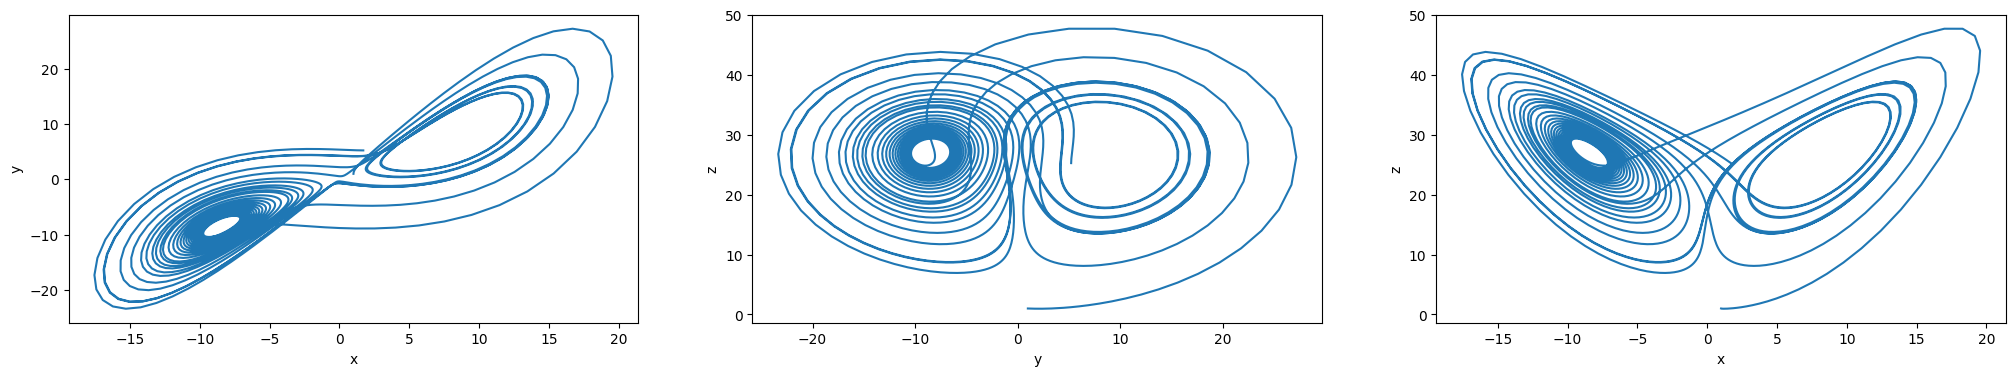

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(25, 4)) 

axes[0].plot(sol[:,0], sol[:,1])
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

axes[1].plot(sol[:,1], sol[:,2])
axes[1].set_xlabel("y")
axes[1].set_ylabel("z")

axes[2].plot(sol[:,0], sol[:,2])
axes[2].set_xlabel("x")
axes[2].set_ylabel("z")

$\quad$ Contudo, a melhor forma de se entender o comportamento das variáveis no espaço de fase é visualizando a sua trajetória através do tempo, onde a animação é o recurso ideal para tal. Assim, faremos um plot da evolução total de uma dada trajetória com condição inicial qualquer, apenas para ter uma idela da "cara" da trajetória que o atrator vai criar; em seguida escolhemos um conjunto de pontos com pequena diferença entre as condiçõoes inicais, basicamente pontos bem próximos; para gerar a animação, evoluiremos os tais pontos de pouco em pouco, plotando só o ponto em cada estágio (e não a trajetória toda). Assim, desenvolvemos o código:

In [ ]:
tempos = np.linspace(0, 20, 1000) # Evoluir desde t=0 até t=25, com 1500 pontos nesse intervalo.


epsilon = 10e-4 # Diferença entre cada coordenadada para o vetor da condição inicial
r_inicial = np.array([0,0,0], float)
N = 10
r_iniciais = np.array([r_inicial], float)
for n in range(N):
    r_iniciais = np.vstack([r_iniciais, r_inicial+(n+1)*epsilon])

solucoes = []
for r0 in r_iniciais:
    sol = odeint(lorenz, r0, tempos, args = (sigma, rho, beta))
    solucoes.append(sol)

fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')


# Função para a animação de cada quadro
def atualizar(frame_idx):
    ax.clear()  # Limpa o gráfico a cada frame
    ax.set_title(f'Atrator de Lorenz - {frame_idx/len(tempos)*100:.2f}%', )
    
    elev = 30
    azim = (frame_idx * 0.5) % 360  # gira lentamente em torno do eixo vertical
    ax.view_init(elev=elev, azim=azim)
    
    sol0 = solucoes[1]
    ax.plot(sol0[:,0], sol0[:, 1], sol0[:, 2], color="red")
    for sol in solucoes:        
        # Ponto atual (preto)
        x, y, z = sol[frame_idx]
        ax.scatter(x, y, z, color='black', s=10)

#Gerar a animação
ani = animation.FuncAnimation(fig, atualizar, frames=len(tempos), interval=50)
plt.close(fig)
ani.save('Lorenz.gif', writer='pillow')


## Atrator de Rossler

$\quad$ Inicialmente estudado por Otto Rossler nos anos 1970, o Atrator de Rossler surge no contexto de um sistema de 3 EDOs, no chamado sistema de Rossler. O atrator presente nesse espaço de fase tem certas similaridades com o atrator de lorenz, mas é consideravelmente mais simple do que o mesmo. Por essa simplicidade, algumas de suas propriedades, como pontos fixos, podem ser estudados por meio de ferramentadas da própria algebra linear, fato que não será aqui abordado. Assim como no caso anteior do atrator de lorenz, simularemos a trajetória de condiçoes iniciais próximas no espaço de fase do sistema de Rossler.   

$$
\frac{dx}{dt} = -(y+z), \quad \frac{dy}{dt} =x+ay\quad \text{e} \quad \frac{dz}{dt} = b+z(x-c).
$$

In [ ]:
def rossler(r, t, a, b, c):
    x, y, z = r[0], r[1], r[2]  
    dx = -(y+z)
    dy = x+a*y
    dz = b+z*(x-c)
    return [dx, dy, dz]

$\quad$ 

Novamente realizando a evolução de apenas uma condição inicial no espaço de fase para nos dar uma ideia geral de como o atrator afeta as trajetórias, temos

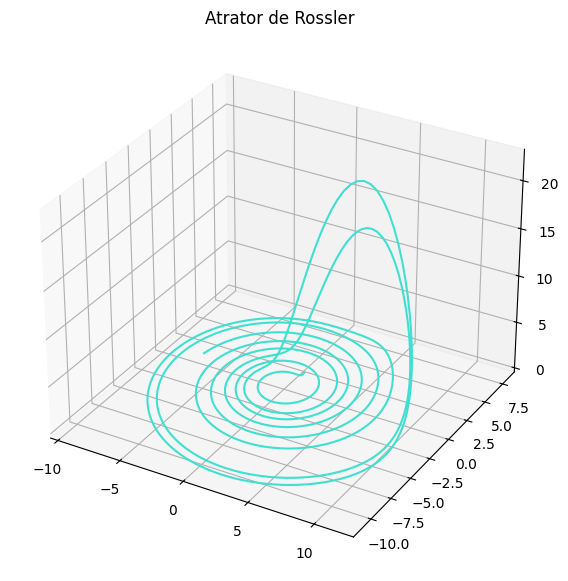

In [ ]:
# Parâmetros do sistema
a, b, c = 0.2, 0.2, 5.7

# Condição inicial
r0 = [1,1,1]


# Vetor temporal
tempos = np.linspace(0, 50, 2000)

sol = odeint(rossler, r0, tempos, args = (a,b,c))

# Plotagem
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], color="turquoise")
ax.set_title("Atrator de Rossler")
plt.show()

Agora representando as projeções em cada eixo:

Text(0, 0.5, 'z')

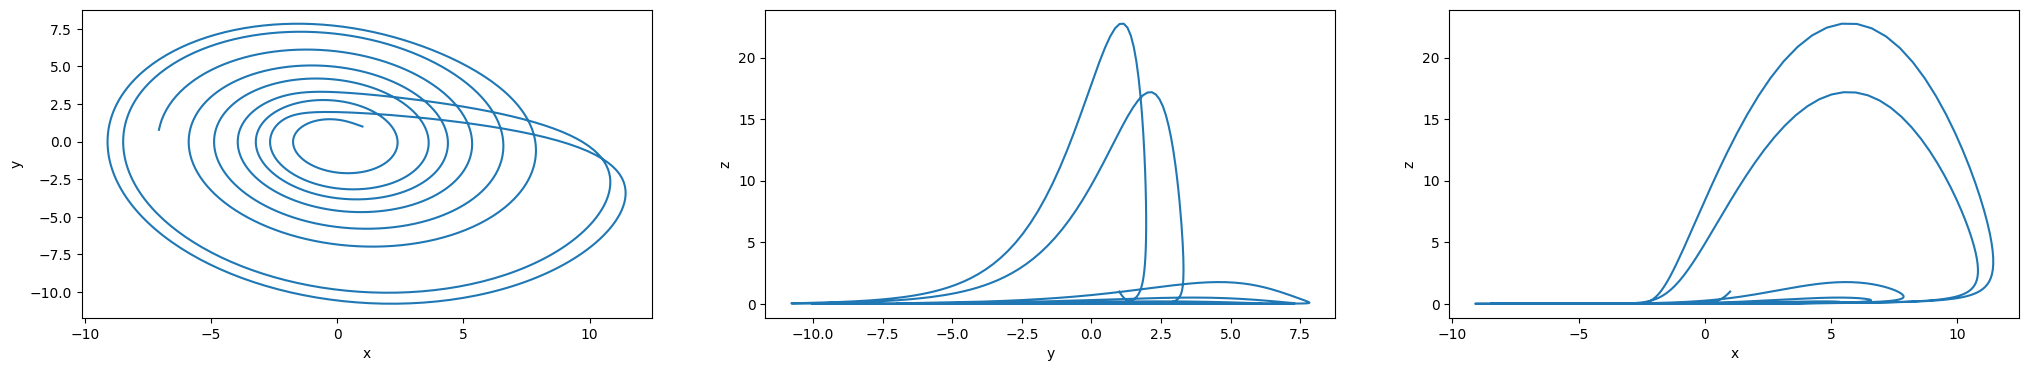

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 4)) 

axes[0].plot(sol[:,0], sol[:,1])
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

axes[1].plot(sol[:,1], sol[:,2])
axes[1].set_xlabel("y")
axes[1].set_ylabel("z")

axes[2].plot(sol[:,0], sol[:,2])
axes[2].set_xlabel("x")
axes[2].set_ylabel("z")

Por fim uma animação da evolução de diversas condições iniciais no espaço de fase desse atrator

In [ ]:
a, b, c = 0.2, 0.2, 5.7
epsilon = 10e-2
r_inicial = np.array([1,1,1], float)
N = 10
r_iniciais = np.array([r_inicial], float)
for n in range(N):
    r_iniciais = np.vstack([r_iniciais, r_inicial+(n+1)*epsilon])

solucoes = []
tempos = np.linspace(0, 25, 1000)
for r0 in r_iniciais:
    sol = odeint(rossler, r0, tempos, args = (a, b, c))
    solucoes.append(sol)

fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

tmps0 = np.linspace(0, 50, 2000)
r0_1 = [2,2,2]
sol_0 = odeint(rossler, r0_1, tmps0, args = (a, b, c))

def atualizar(frame_idx):
    ax.clear()  # Limpa o gráfico a cada frame
    ax.set_title(f'Atrator de Rossler - {frame_idx/len(tempos)*100:.2f}%', )
    
    elev = 30
    azim = (frame_idx * 0.5) % 360  # gira lentamente em torno do eixo vertical
    ax.view_init(elev=elev, azim=azim)
    
    ax.plot(sol_0[:,0], sol_0[:, 1], sol_0[:, 2], color="blue")
    
    for sol in solucoes:        
        # Ponto atual (preto)
        x, y, z = sol[frame_idx]
        ax.scatter(x, y, z, color='black', s=10)


ani = animation.FuncAnimation(fig, atualizar, frames=len(tempos), interval=50)
plt.close(fig)
ani.save('Rossler.gif', writer='pillow')

## _Atrator do Pendulo Físico_

## Atrator de Langford

## Multiscroll Attractor 

$\quad$ Também conhecido como o Atrator de Chua, o Double-Scroll Attractor tem sua origem num circuito eletrônico caótico com um resistor não linear simples, o denominado circuito de Chua. Tal circuito é um sistema decrito por 3 EDOs, sendo elas:

$$
\frac{dx}{dt} = a(y-x), \quad \frac{dy}{dt} = (c-a)x - xz + cy \quad \text{e} \quad \frac{dz}{dt} = xy - bz.
$$

In [ ]:
def Chua(r, t, a, b, c):
    x, y, z = r[0], r[1], r[2]  
    dx = a*(y-x)
    dy = (c-a)*x - x*z + c*y
    dz = x*y - b*z
    return [dx, dy, dz]

Primeira visão sobre o atrator

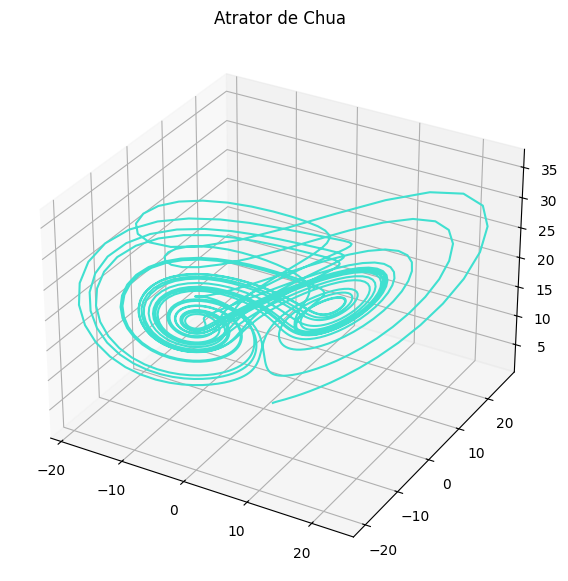

In [ ]:
# Parâmetros do sistema
a, b, c = 40, 3, 28

# Condição inicial
r0 = [1,1,1]

# Vetor temporal
tempos = np.linspace(0, 20, 2000)

sol = odeint(Chua, r0, tempos, args = (a,b,c))

# Plotagem
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], color="turquoise")
ax.set_title("Atrator de Chua")
plt.show()

Recortes em cada eixo

Text(0, 0.5, 'z')

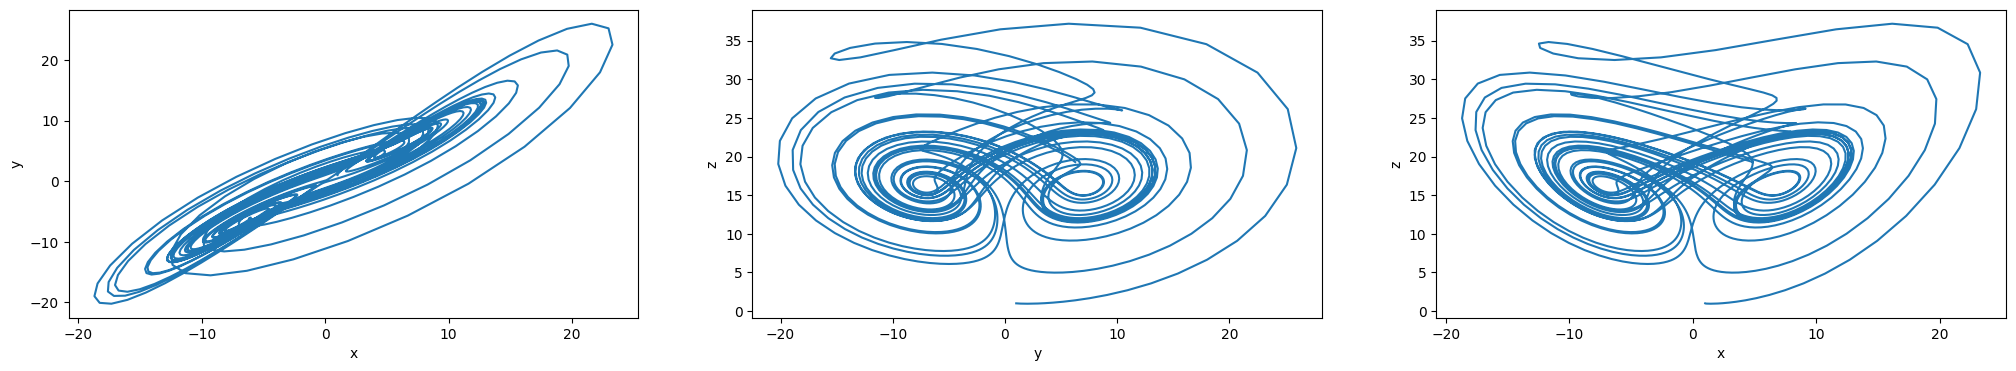

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 4)) 

axes[0].plot(sol[:,0], sol[:,1])
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

axes[1].plot(sol[:,1], sol[:,2])
axes[1].set_xlabel("y")
axes[1].set_ylabel("z")

axes[2].plot(sol[:,0], sol[:,2])
axes[2].set_xlabel("x")
axes[2].set_ylabel("z")

Animação

In [ ]:
a, b, c = 40, 28, 3

epsilon = 10e-4
r_inicial = np.array([1,1,1], float)
N = 10
r_iniciais = np.array([r_inicial], float)
for n in range(N):
    r_iniciais = np.vstack([r_iniciais, r_inicial+(n+1)*epsilon])

solucoes = []
for r0 in r_iniciais:
    sol = odeint(chua, r0, tempos, args = (a, b, c))
    solucoes.append(sol)

fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

def atualizar(frame_idx):
    ax.clear()  # Limpa o gráfico a cada frame
    ax.set_title(f'Atrator de Chua - {frame_idx/len(tempos)*100:.2f}%', )
    
    elev = 30
    azim = (frame_idx * 0.5) % 360  # gira lentamente em torno do eixo vertical
    ax.view_init(elev=elev, azim=azim)
    
    sol0 = solucoes[1]
    ax.plot(sol0[:,0], sol0[:, 1], sol0[:, 2], color="red")
    for sol in solucoes:        
        # Ponto atual (preto)
        x, y, z = sol[frame_idx]
        ax.scatter(x, y, z, color='black', s=10)

ani = animation.FuncAnimation(fig, atualizar, frames=len(tempos), interval=50)
plt.close(fig)
ani.save('Chua.gif', writer='pillow')

ValueError: quantization error

## Hénon Map

$\quad$ Também exibindo um comportamento caótico, o mapa de Hénon é um sistema dinâmico com tempo discreto. As equações que o descrevem são as seguintes:

$$ 
x_{n+1} = 1 - ax_n^2 + y_n \ \text{ e } \ y_{n+1} = bx_n.
$$

In [ ]:
def henon_map(xn,yn, a, b):
    xn_p1 = 1 - a*xn**2 + yn
    yn_p1 = b*xn
    return np.array([xn_p1, yn_p1], float)

$\quad$ Definindo os valores clássicos utilizados para as constantens, $a = 1.4$ e $b = 0.3$ e evoluindo a condição inicial $x = 0$ e $y=0$ 50 vezes, temos o seguintes plot

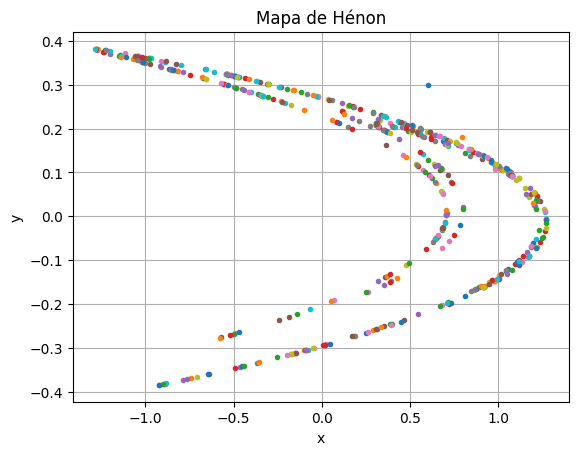

In [ ]:
a, b = 1.4, 0.3 # Constantes

r0 = np.array([1,1], float) # Condição Inicial

xs = [r0[0]]
ys = [r0[1]]

N = 500
for n in range(N):
    r0 = henon_map(r0[0], r0[1], a, b)    
    plt.plot(r0[0], r0[1], marker='o', linestyle='', markersize=3)

plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.title("Mapa de Hénon")
plt.show()

Testando um ponto fixo

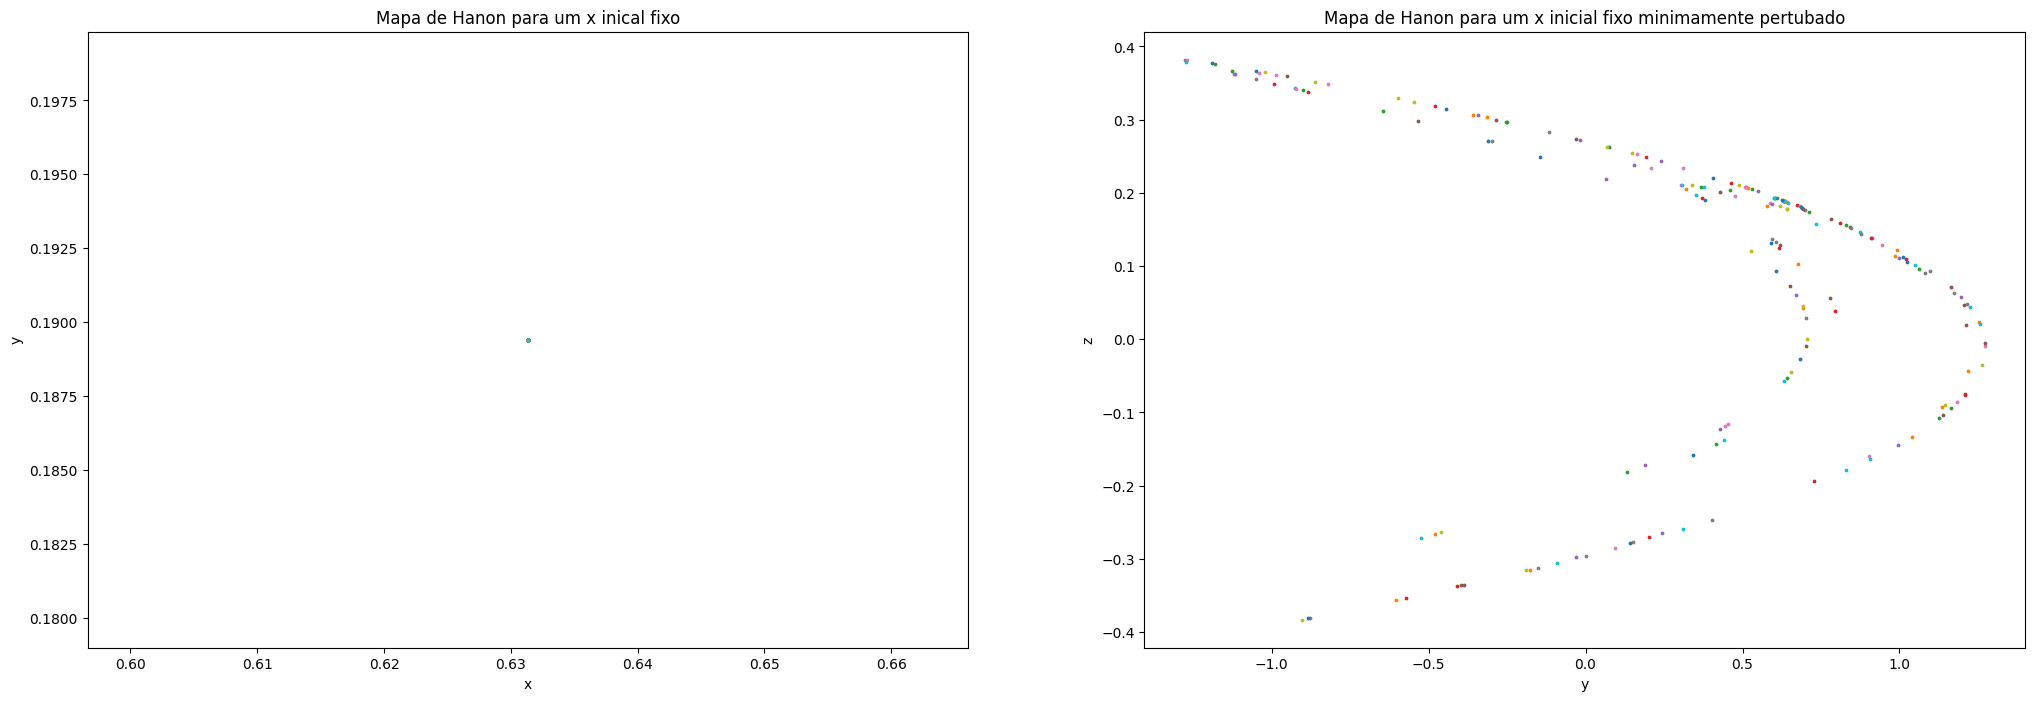

In [ ]:
r0 = np.array([(np.sqrt(609)-7)/28,  3*(np.sqrt(609)-7)/(280)], float) # Condição Inicial
epsilon = 10e-6
r1 = r0+epsilon

N = 500
fig, axes = plt.subplots(1, 2, figsize=(25, 8)) 

axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_title("Mapa de Hanon para um x inical fixo")

for n in range(N):
    r0 = henon_map(r0[0], r0[1], a, b)    
    axes[0].scatter(r0[0], r0[1], s=3)

axes[1].set_xlabel("y")
axes[1].set_ylabel("z")
axes[1].set_title("Mapa de Hanon para um x inicial fixo minimamente pertubado")

for n in range(N):
    r1 = henon_map(r1[0], r1[1], a, b)    
    axes[1].scatter(r1[0], r1[1], s=3)


Animacao da evolucao do mapa

In [ ]:
r0 = np.array([1,1], float) # Condição Inicial

xs = [r0[0]]
ys = [r0[1]]


N = 300
sol = [r0.copy()]

for _ in range(N):
    r0 = henon_map(r0[0], r0[1], a, b)
    sol.append(r0.copy())

# Preparando a figura
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.5, 0.5)

def atualizar(frame_idx):
    ax.set_title(f'Mapa de Hénon - {frame_idx/len(sol)*100:.2f}%')
    x, y = sol[frame_idx]
    ax.scatter(x,y, s = 1)


ani = animation.FuncAnimation(fig, atualizar, frames=len(sol), interval=50)
plt.close(fig)
ani.save('mapa_henon.gif', writer='pillow')


## Conclusão

$\quad$ Concluímos que o estudo do comportamento de sistemas caóticos é de suma importancia para a física, cujas utilidades podem passar tanto pela área de climatologia (com as Eq. de Lorenz) indo até sistemas eletrônicos (com as Eq. de Chua). Portanto, entender o comportamento e otimizar o poder de previsibilidade de tais sistemas é essencial.

# Referências

**[1]**

**[2]**

**[3]**

**[4]**






https://www.bbc.com/portuguese/geral-59617541 --- citacao do lorenz